# Setting

## Install and import

In [74]:
# install
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [75]:
# import 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [76]:
# import 2
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

## Read experiment data

In [77]:
# read test data
from PIL import Image
image_test = Image.open('test_01.png')

'''Q'''
# why is not picture?
image_test.show()
print(image_test.format, image_test.size, image_test.mode)

PNG (114, 126) RGBA


<function matplotlib.pyplot.show(close=None, block=None)>

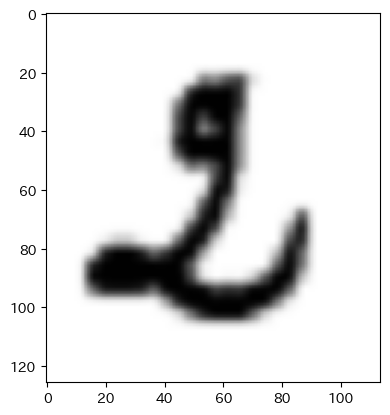

In [78]:
# show the data
plt.imshow(image_test)
plt.axis('on')
plt.show

In [79]:
print(type(image_test))

<class 'PIL.PngImagePlugin.PngImageFile'>


## Judge Gpu

In [80]:
# confirm cpu or gpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## Read train data

In [81]:
# read train data(experinence)
import torchvision.datasets as datasets
data_root = './data'

train_set0 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True
)

In [82]:
# read train data and transform to the shape that neural network can use
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1))
])

train_set = datasets.MNIST(
    root=data_root, train=True, download=True, transform=transform
)

test_set = datasets.MNIST(
    root = data_root, train = False, download = True, transform = transform
)

# Look and setting train data

In [83]:
train_set[0]

(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

In [84]:
train_set[0][0]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [85]:
train_set[0][0].shape

torch.Size([784])

In [86]:
train_set[0][0][1]

tensor(-1.)

In [87]:
train_set[0][1]

5

In [88]:
train_set[59999]

(tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -

In [89]:
image, label = train_set[0]
print(image.shape)
print(image.data.min())
print(image.data.max())

torch.Size([784])
tensor(-1.)
tensor(1.)


Is there difference between image.data and image

In [90]:
image.data

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [91]:
image

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [92]:
for i in range(784):
  if image.data[i] != train_set[0][0][i]:
    print(i)
    break

  else:
    continue

# Sepparate by Batch

In [93]:
from torch.utils.data import DataLoader

batch_size = 500

train_loader = DataLoader(
    train_set, batch_size = batch_size, shuffle = True
)

test_loader = DataLoader(
    test_set, batch_size =batch_size, shuffle = False
)

In [94]:
# break to continue, what happen?
# images, labels = train_loader, what happen?

In [95]:
for images, labels in train_loader:
    continue

print(images.shape)
print(labels.shape)

torch.Size([500, 784])
torch.Size([500])


In [96]:
images[1]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [97]:
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

torch.Size([500, 784])
torch.Size([500])


In [98]:
images[1]

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.00

In [99]:
for a, b in train_loader:
    break

print(images.shape)
print(labels.shape)

torch.Size([500, 784])
torch.Size([500])


In [100]:
# It is correct because of suffle

In [101]:
for i in range(784):
  if images[0][i] == a[0][i]:
    continue
  else:
    print(i)
    break

74


In [102]:
# not suffle, however there is differnece.

In [103]:
# from torch.utils.data import DataLoader

# batch_size = 500

# train_loader = DataLoader(
#     train_set, batch_size = batch_size, shuffle = False
# )

In [104]:
train_loader

# Determine Model(Nural Network)

In [105]:
# set parameters of Linner
n_input = image.shape[0]

n_output = len(set(list(labels.data.numpy())))

n_hidden = 128

print(n_input, n_output)

784 10


In [106]:
# define Model
class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    self.l1 = nn.Linear(n_input, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_hidden)
    self.l3 = nn.Linear(n_hidden, n_output)
    self.relu = nn.ReLU(inplace=True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    x4 = self.relu(x3)
    x5 = self.l3(x4)
    return x5

# Learning(Loss : CrossEntropy, Optimizer : SGD)

In [107]:
lr = 0.01

net = Net(n_input, n_output, n_hidden) # .to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr = lr)

num_epochs = 100

history = np.zeros((0,5))

In [108]:
from tqdm.notebook import tqdm

for epoch in range(num_epochs):
  n_train_acc, n_val_acc = 0, 0
  train_loss, val_loss = 0, 0
  n_train, n_test = 0, 0

  for inputs, labels in tqdm(train_loader):

    train_batch_size = len(labels)

    n_train += train_batch_size

    inputs = inputs #.to(device)
    labels = labels #.to(device)

    optimizer.zero_grad()

    outputs = net(inputs)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    # search max data by 1 line, and get index[1]
    predicted = torch.max(outputs, 1)[1]

    train_loss += loss.item() * train_batch_size
    n_train_acc += (predicted == labels).sum().item()

  for inputs_test, labels_test in test_loader:
    test_batch_size = len(labels_test)
    n_test += test_batch_size

    outputs_test = net(inputs_test)

    loss_test = criterion(outputs_test, labels_test)

    predicted_test = torch.max(outputs_test, 1)[1]

    val_loss += loss_test.item() * test_batch_size
    n_val_acc += (predicted_test == labels_test).sum().item()

  train_acc = n_train_acc / n_train
  val_acc = n_val_acc / n_test

  ave_train_loss = train_loss / n_train
  ave_val_loss = val_loss / n_test

  item = np.array([epoch+1, ave_train_loss, ave_val_loss, train_acc, val_acc])
  history = np.vstack((history, item))

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

In [109]:
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

初期状態: 損失: 0.33728 精度: 0.49830
最終状態: 損失: 0.96190 精度: 0.95830


# Predict image_test

In [110]:
pip install Pillow

In [111]:
test_path = 'test_01.png'
width, height = image_test.size

print(f'Image Path: {test_path}')
print(f'Width: {width} pixels')
print(f'Height: {height} pixels')

Image Path: test_01.png
Width: 114 pixels
Height: 126 pixels


In [112]:
image_test.size

(114, 126)

In [113]:
try:
  base_width = 28
  width_percent = (base_width / float(image_test.size[0]))
  new_heigth = int((float(image_test.size[1] * float(width_percent))))
  new_size = (base_width, new_heigth)

  resized_image_1 = image_test.resize(new_size, Image.ANTIALIAS)

  resized_image_1.save('resized_image_1.png')
# why does not show the picture?
  resized_image_1.show()
  print(resized_image_1.size)

except FileNotFoundError:
  print(f'The file {test_path} does not exist')

except Exception as e:
  print(e)

(28, 30)


<ipython-input-113-1ee2fee925d0>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image_1 = image_test.resize(new_size, Image.ANTIALIAS)


<function matplotlib.pyplot.show(close=None, block=None)>

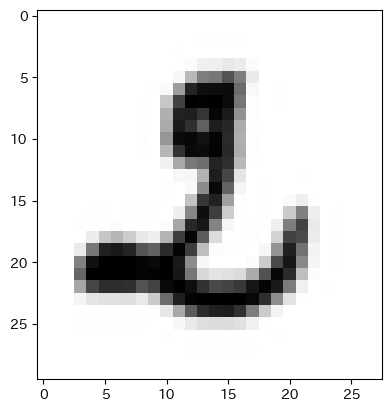

In [114]:
plt.imshow(resized_image_1)
plt.axis('on')
plt.show

In [127]:
# why does not be size 28
transform_sp = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Resize((28,28))
])

input_test_01 = transform_sp(resized_image_1)
input_test_01

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [128]:
resized_image_1.size

(28, 30)

In [117]:
resized_image_1.info

{'icc_profile': b'\x00\x00\x0f\xc0appl\x02\x10\x00\x00mntrRGB XYZ \x07\xe8\x00\x04\x00\x0c\x00\x0e\x00\n\x00\x10acspAPPL\x00\x00\x00\x00APPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-appl\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11desc\x00\x00\x01P\x00\x00\x00bdscm\x00\x00\x01\xb4\x00\x00\x04\x9ccprt\x00\x00\x06P\x00\x00\x00#wtpt\x00\x00\x06t\x00\x00\x00\x14rXYZ\x00\x00\x06\x88\x00\x00\x00\x14gXYZ\x00\x00\x06\x9c\x00\x00\x00\x14bXYZ\x00\x00\x06\xb0\x00\x00\x00\x14rTRC\x00\x00\x06\xc4\x00\x00\x08\x0caarg\x00\x00\x0e\xd0\x00\x00\x00 vcgt\x00\x00\x0e\xf0\x00\x00\x000ndin\x00\x00\x0f \x00\x00\x00>mmod\x00\x00\x0f`\x00\x00\x00(vcgp\x00\x00\x0f\x88\x00\x00\x008bTRC\x00\x00\x06\xc4\x00\x00\x08\x0cgTRC\x00\x00\x06\xc4\x00\x00\x08\x0caabg\x00\x00\x0e\xd0\x00\x00\x00 aagg\x00\x00\x0e\x

In [118]:
resized_image_1.mode

'RGBA'

In [119]:
images.mode

<function Tensor.mode>

In [120]:
images[1].mode

<function Tensor.mode>

In [121]:
input_test_01.type

<function Tensor.type>

In [129]:
input_test_01.shape

torch.Size([4, 28, 28])

<function matplotlib.pyplot.show(close=None, block=None)>

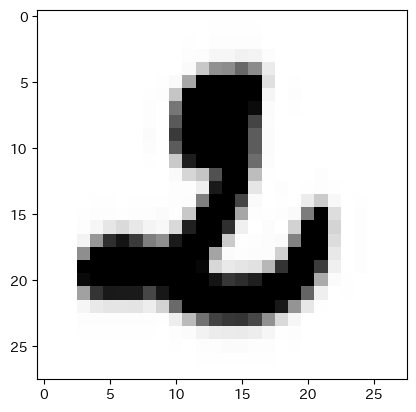

In [130]:
# what is permute?
input_test_01_permuted = input_test_01.permute(1, 2, 0)
plt.imshow(input_test_01_permuted)
plt.axis('on')
plt.show

In [131]:
input_test_01_permuted.shape

torch.Size([28, 28, 4])

In [134]:
input_test_01_permuted.mode

<function Tensor.mode>

In [136]:
a  = input_test_01_permuted.reshape(-1, 28 * 28)
a.shape

torch.Size([4, 784])

In [137]:
a.mode

<function Tensor.mode>

<function matplotlib.pyplot.show(close=None, block=None)>

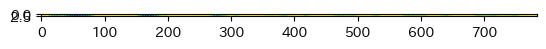

In [138]:
plt.imshow(a)
plt.axis('on')
plt.show

In [125]:
# input_test_01_reshaped = input_test_01.squeeze(0)
# plt.imshow(input_test_01_reshaped)
# plt.imshow(input_test_01)
# plt.axis('on')
# plt.show

In [140]:
fx = net(a)
fx

tensor([[ 0.3805,  0.0061,  0.6924,  0.1737, -0.7498,  0.2254, -0.3535,  0.3897,
         -0.5491, -0.3814],
        [ 0.1751,  0.1122,  0.6645,  0.6161, -0.9952,  0.1440, -0.4784,  0.2455,
         -0.3917, -0.4413],
        [ 0.5508, -0.2808,  0.6377, -0.3020, -0.6834, -0.3169, -0.4664,  0.8275,
         -0.0333, -0.2601],
        [ 0.1578,  0.2317,  0.5789,  0.4424, -0.6446,  0.1272, -0.3768,  0.5450,
         -0.8223, -0.3344]], grad_fn=<AddmmBackward0>)